In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [41]:
df1=yf.Ticker('DOGE-USD').history(start='2016-01-01', end='2022-03-28')['Close']
df2=yf.Ticker('BTC-USD').history(start='2016-01-01', end='2022-03-28')['Close']
df3=yf.Ticker('LTC-USD').history(start='2016-01-01', end='2022-03-28')['Close']
df4=yf.Ticker('ETH-USD').history(start='2016-01-01', end='2022-03-28')['Close']
df=pd.DataFrame({'BTC':df2,'LTC':df3,'DOGE':df1,'ETH':df4})

In [42]:
df

,BTC,LTC,DOGE,ETH
Date,,,,
2015-12-31,430.566986,3.480170,NaN,NaN
2016-01-01,434.334015,3.508980,NaN,NaN
2016-01-02,433.437988,3.502160,NaN,NaN
2016-01-03,430.010986,3.483070,NaN,NaN
2016-01-04,433.091003,3.495390,NaN,NaN
...,...,...,...,...
2022-03-23,42892.957031,122.475418,0.129727,3031.067139
2022-03-24,43960.933594,126.581276,0.136550,3108.062012
2022-03-25,44348.730469,124.067368,0.131013,3106.671387


In [43]:
df.describe()

,BTC,LTC,DOGE,ETH
count,2279.000000,2279.000000,1600.000000,1600.000000
mean,14061.699121,80.062066,0.056613,1030.282198
std,17030.727847,70.599316,0.105397,1233.045878
min,364.330994,2.996780,0.001038,84.308296
25%,2749.885010,31.969308,0.002510,196.686607
50%,7653.979980,57.658009,0.003246,386.528229
75%,12205.457520,123.687183,0.053347,1678.047638
max,67566.828125,386.450775,0.684777,4812.087402


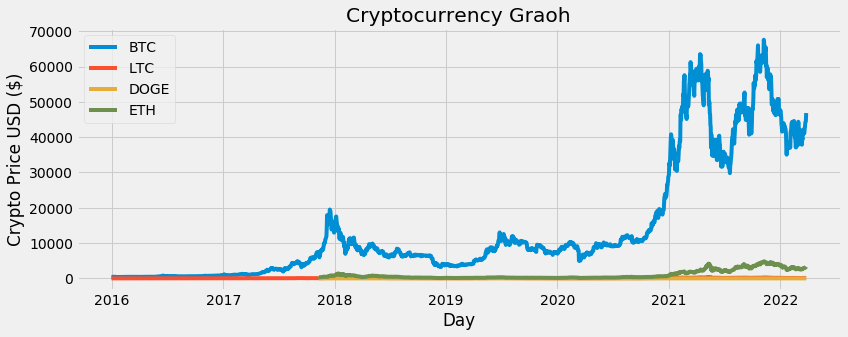

In [44]:
my_crypto=df
plt.figure(figsize=(12.2,4.5))
for c in my_crypto.columns.values:
    plt.plot(my_crypto[c],label=c)
plt.title('Cryptocurrency Graoh')
plt.xlabel('Day')
plt.ylabel('Crypto Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [45]:
#Scale the data
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,100))
scaled=min_max_scaler.fit_transform(df)

In [46]:
scaled

array([[ 0.0985618 ,  0.12606208,         nan,         nan],
       [ 0.10416729,  0.13357538,         nan,         nan],
       [ 0.10283397,  0.13179682,         nan,         nan],
       ...,
       [65.45054329, 31.5736931 , 19.00944687, 63.92775599],
       [65.67687068, 31.78596494, 19.71951195, 64.69994875],
       [69.12862345, 32.96371869, 21.01591308, 67.8388154 ]])

In [47]:
#Convert the scaled data into a dataframe
df_scaled=pd.DataFrame(scaled,columns=df.columns)
df_scaled=df_scaled.set_index(pd.DatetimeIndex(df.index))
#Show the data
df_scaled

,BTC,LTC,DOGE,ETH
Date,,,,
2015-12-31,0.098562,0.126062,NaN,NaN
2016-01-01,0.104167,0.133575,NaN,NaN
2016-01-02,0.102834,0.131797,NaN,NaN
2016-01-03,0.097734,0.126818,NaN,NaN
2016-01-04,0.102318,0.130031,NaN,NaN
...,...,...,...,...
2022-03-23,63.284294,31.158533,18.821363,62.328607
2022-03-24,64.873486,32.229289,19.819257,63.957170
2022-03-25,65.450543,31.573693,19.009447,63.927756


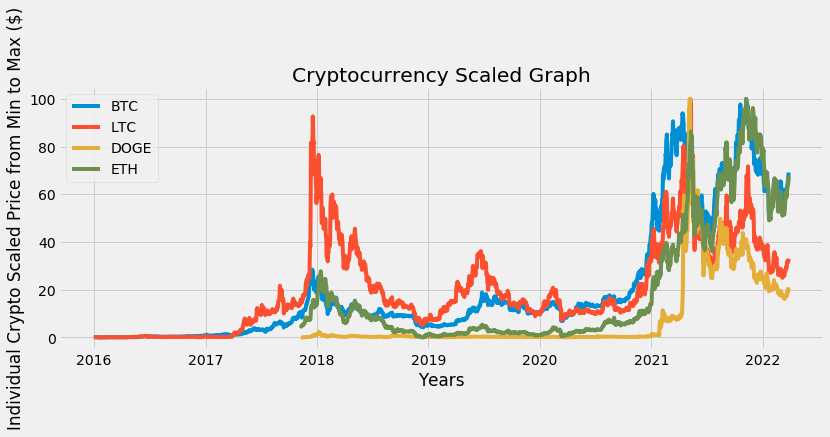

In [48]:
my_crypto=df_scaled
plt.figure(figsize=(12.2,4.5))
for c in my_crypto.columns.values:
    plt.plot(my_crypto[c],label=c)
plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Years')
plt.ylabel('Individual Crypto Scaled Price from Min to Max ($)')
plt.legend(loc='upper left')
plt.show()

In [49]:
#Get the daily Simple Return 
DSR=df.pct_change(1)
#Show the data
DSR

,BTC,LTC,DOGE,ETH
Date,,,,
2015-12-31,NaN,NaN,NaN,NaN
2016-01-01,0.008749,0.008278,NaN,NaN
2016-01-02,-0.002063,-0.001944,NaN,NaN
2016-01-03,-0.007907,-0.005451,NaN,NaN
2016-01-04,0.007163,0.003537,NaN,NaN
...,...,...,...,...
2022-03-23,0.012610,-0.003681,0.059160,0.019487
2022-03-24,0.024899,0.033524,0.052595,0.025402
2022-03-25,0.008821,-0.019860,-0.040549,-0.000447


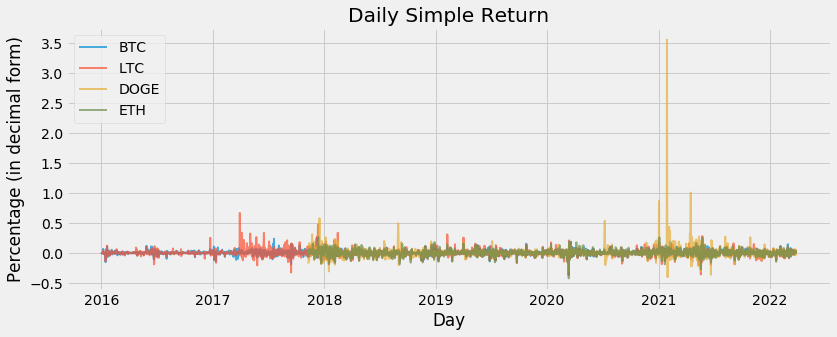

In [50]:
my_crypto=DSR
plt.figure(figsize=(12.2,4.5))
for c in my_crypto.columns.values:
    plt.plot(my_crypto[c],label=c,alpha=.7,lw = 2)
plt.title('Daily Simple Return')
plt.xlabel('Day')
plt.ylabel('Percentage (in decimal form)')
plt.legend(loc='upper left')
plt.show()

In [52]:
print('The crypotocurrency volatility')
DSR.std()

The crypotocurrency volatility


BTC     0.039509
LTC     0.057834
DOGE    0.117996
ETH     0.051329
dtype: float64

In [53]:
#show the mean or average daily simple return
DSR.mean()

BTC     0.002847
LTC     0.003202
DOGE    0.006861
ETH     0.002798
dtype: float64

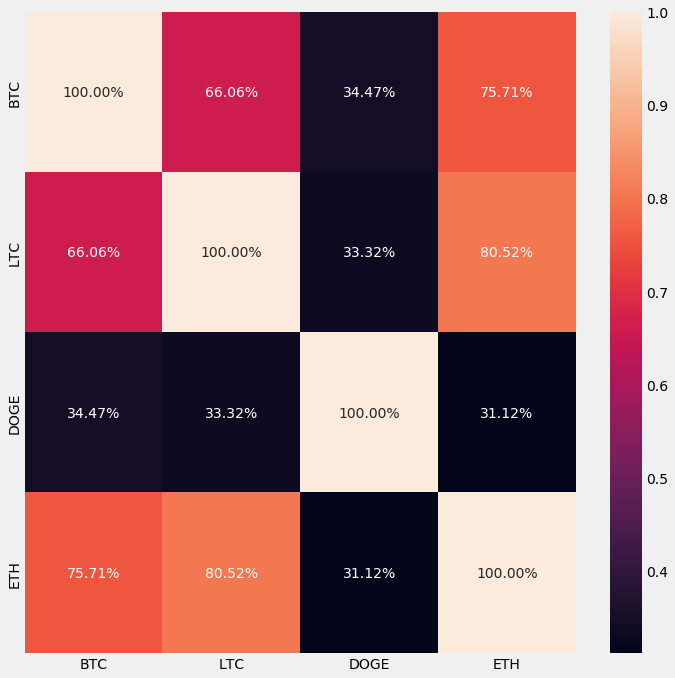

In [54]:
import seaborn as sns
plt.subplots(figsize = (11,11))
sns.heatmap(DSR.corr(),annot=True,fmt='.2%')
plt.show()

In [55]:
#Get and show the daily cumulative simple returns
DCSR = (DSR+1).cumprod()
#show the data
DCSR

,BTC,LTC,DOGE,ETH
Date,,,,
2015-12-31,NaN,NaN,NaN,NaN
2016-01-01,1.008749,1.008278,NaN,NaN
2016-01-02,1.006668,1.006319,NaN,NaN
2016-01-03,0.998709,1.000833,NaN,NaN
2016-01-04,1.005862,1.004373,NaN,NaN
...,...,...,...,...
2022-03-23,99.619707,35.192366,91.679866,9.445990
2022-03-24,102.100103,36.372153,96.501766,9.685936
2022-03-25,103.000769,35.649801,92.588700,9.681603


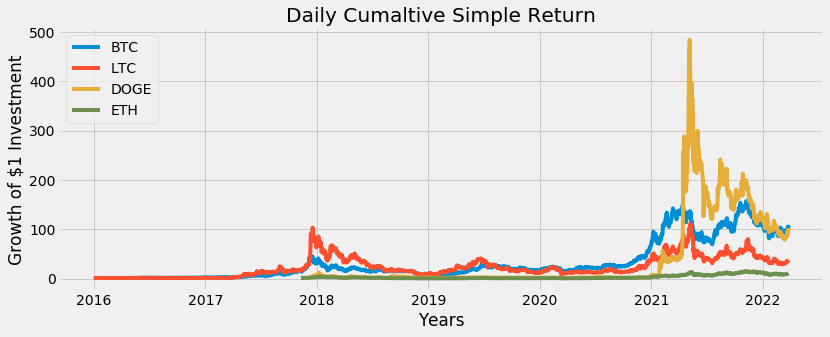

In [56]:
my_crypto=DCSR
plt.figure(figsize=(12.2,4.5))
for c in my_crypto.columns.values:
    plt.plot(my_crypto[c],label=c)
plt.title('Daily Cumaltive Simple Return')
plt.xlabel('Years')
plt.ylabel('Growth of $1 Investment')
plt.legend(loc='upper left')
plt.show()